<a href="https://colab.research.google.com/github/cjimenez275/Simulacion_Fisica/blob/main/7_ODEINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales utilizando ODEINT

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Ecuación diferencial de primer grado

Solucionemos por ejemplo la ecuación diferencial
$$\frac{dy}{dx}=4y\hspace{1cm}y(0)=2$$

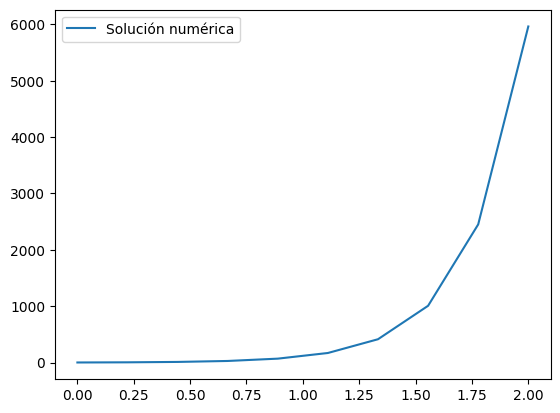

In [ ]:
x0 = 0
y0 = 2
def ecuacion(y, x):
  f = 4*y
  return f
x = np.linspace(0, 2, 10)
ysol = odeint(ecuacion, y0, x)

plt.plot(x, ysol, label="Solución numérica")
plt.legend()
plt.show()

## Ecuación diferencial de segundo grado

Solucionemos la ED:
$$x''+ fx'+gx+h=0$$
Con
$$x(0)= a\hspace{1cm}x'(0)=b$$

Despejamos:
$$x''=-fx'-gx-h$$
y definimos los vectores:
$$R = [x, x']$$
$$F = [x', -fx'-gx-h]$$
Llamamos $x'=v$

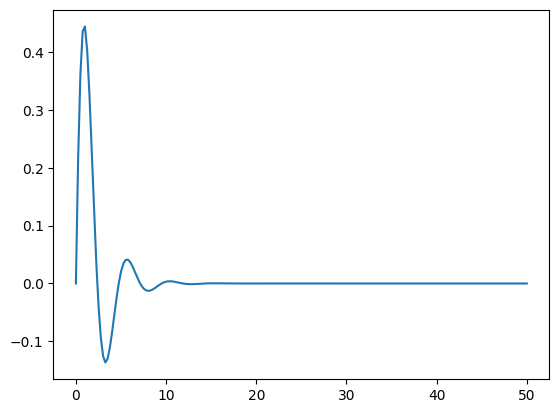

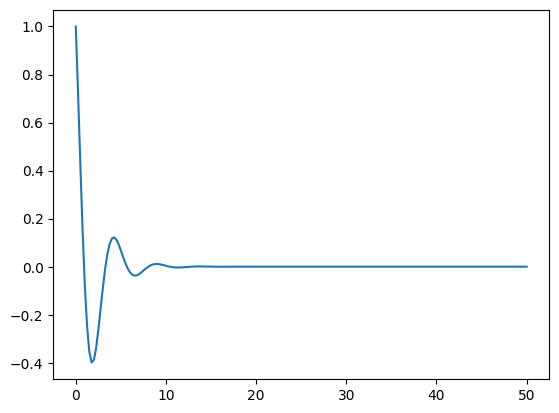

In [ ]:
#Condiciones iniciales
a, b = 0, 1
f, g, h = 1, 2, 0
x0 = a
v0 = b
R0 = [x0, v0]       # Vector con las condiciones iniciales

# Se define la ecuación vectorial y se inician las variables en R0
def equations(R0, t):
    x, v = R0
    F = [v, -f*v-g*x-h]
    return F
t = np.linspace(0, 50, 200)

#Solución a la ecuación diferencial
xsol = odeint(equations, R0,  t)
# Se grafican los resultados de x(t)
plt.plot(t, xsol[:,0])
plt.show()
# Se grafican los resultados de v(t)
plt.plot(t, xsol[:,1])
plt.show()

En este codigo solucionamos ecuaciones diferenciales de segundo orden, ejemplo
$$\frac{d^2x}{dt^2}+2\gamma \frac{dx}{dt}+\omega_0^2 x=0$$

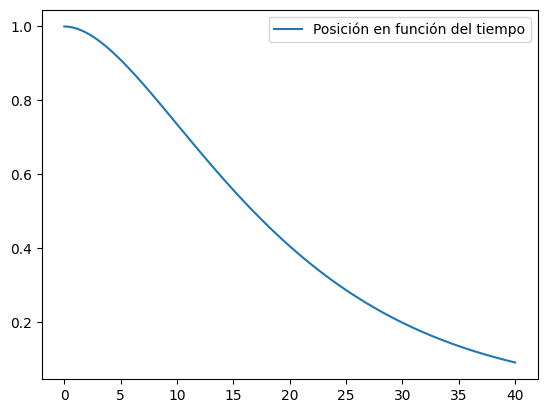

In [7]:
g = 0.1
w0 = 0.1
x0 = [1, 0]
def ecuacion(y0,x):
  x, v = y0
  f = [v, -2*g*v-(w0**2)*x]
  return f

t = np.linspace(0, 40, 100)
xsol = odeint(ecuacion, x0, t)
print()
plt.plot(t, xsol[:, 0], label="Posición en función del tiempo")
plt.legend()
plt.show()


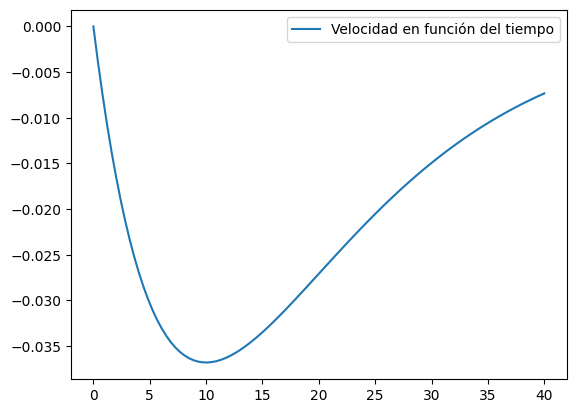

In [8]:
plt.plot(t, xsol[:, 1], label="Velocidad en función del tiempo")
plt.legend()
plt.show()

Ejemplo:
Esfera que cae en el agua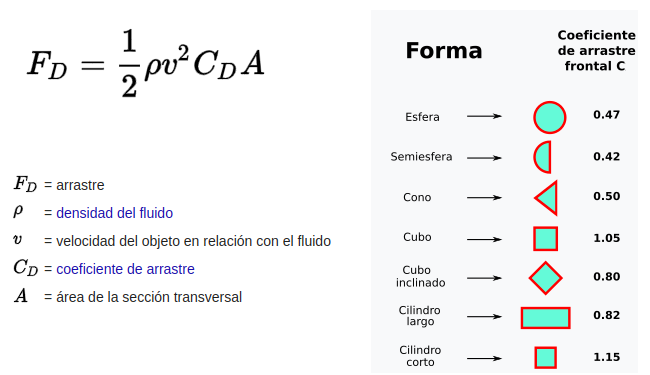

Suponiendo un sistema de referencia positivo hacia abajo, la ecuación de movimiento es:
$$mg-\rho_fVg-\alpha v^2=ma\hspace{2.2cm}\alpha=\frac{1}{2}\rho_fCA$$
$$x''=(1-\frac{\rho_f}{\rho})g-\frac{\alpha}{m}x'^2$$

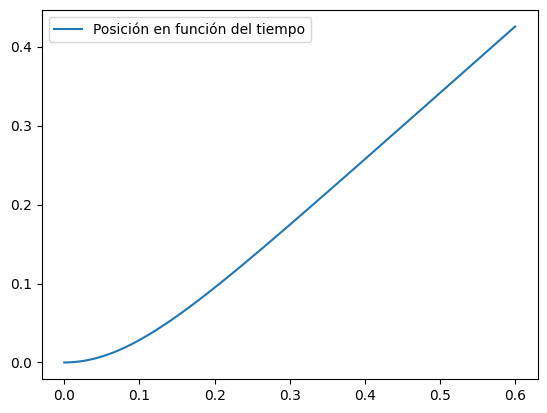

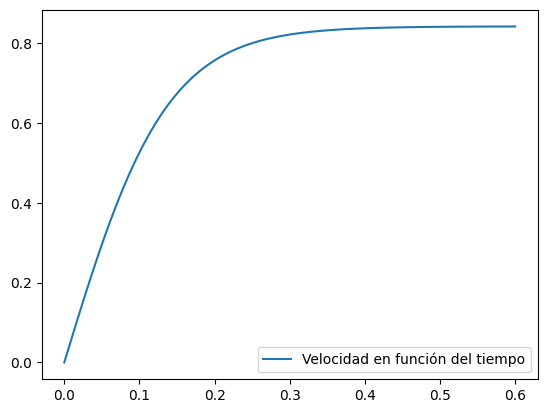

la velocidad limite es:  0.84 m/s


In [14]:
g, pf, p, m = 9.8, 1000, 2700, 0.0027
C=0.47
A = 0.0001
a=0.5*pf*C*A

x0 = [0, 0]
def ecuacion(y0,x):
  x, v = y0
  f = [v, (1-(pf/p))*g-(a/m)*v**2]
  return f

t = np.linspace(0, 0.6, 100)
xsol = odeint(ecuacion, x0, t)
print()
plt.plot(t, xsol[:, 0], label="Posición en función del tiempo")
plt.legend()
plt.show()
plt.plot(t, xsol[:, 1], label="Velocidad en función del tiempo")
plt.legend()
plt.show()
print("la velocidad limite es: ", round(xsol[-1, 1], 2), "m/s")